# Taller T3 Pirámides Binomiales

Integrantes :

Juan Diego Arias rol_202073590-5

Alonso Maureira rol_202073589-1

Ricardo Parragué rol_202073605-7

enlace videos: https://drive.google.com/drive/folders/1ZcJlD2pbxTOWnl-avKEtqO88Kl1e7RIR?usp=sharing

** Este taller fue realizado estrictamente por los 3 integrantes identificados en conformidad con el código de honor UTFSM **

<table align='left'>
<tr>
<td><img src='https://bitcoinist.com/wp-content/uploads/2019/12/30-December-1-e1577702026209.jpg' width='850'/> </td>
</tr>
</table>


Imagine que el valor de cierta criptomoneda evoluciona con incrementos diarios independientes de manera que el $i$-ésimo día

\begin{eqnarray}
Z_{i+1} &= \left\{ \begin{array}{rl} 
2\cdot Z_{i} & \mbox{ con probabilidad} \ p\\
1/2 \cdot Z_{i} & \mbox{ con probabilidad} \ 1-p\\
\end{array} \right. \ \ \ \forall i=1,2,\ldots
\end{eqnarray}

Si definimos $Y_i=\log_2(Z_{i})$, lo anterior es equivalente a escribir

\begin{eqnarray}
Y_{i+1} & = Y_{i} + X_i \ \ \ \forall i=1,2,\ldots
\end{eqnarray}

donde $X_i$ es una v.a. discreta de Rademacher (que toma el valor $1$ con probabilidad $p$ y el valor $-1$ con probabilidad $1-p$).

Suponga que valor actual de la moneda es $Z_0=1$ (de modo que $Y_0=0$).

# Actividades


1.   Determine los posibles valores de la moneda n días hacia adelante ($Z_n$) y su correspondiente f.d.p. 

2.   Compruebe el resultado anterior vía simulación para n=10 y p=3/5. ¿Cuál es el valor más probable de $Z_n$? ¿Es simétrica la distribución? ¿Qué sucede si p=1/2?

3.   Construya un gráfico para el valor esperado y la varianza del valor que de la moneda durante los primeros 30 días. Compare lo que sucede con p=3/5 y p=1/2. ¿Qué observa? ¿Qué relación existe entre estos valores y los primeros momentos de $Y_n$? 

4.   Use la ley de los grandes números para los estimar los valores esperados y las varianzas de la pregunta anterior mediante simulación. ¿Obtiene buenas aproximaciones de los valores teóricos? ¿De qué depende?

5.   Suponga que cuando vende una moneda debe pagar un impuesto de $I=1.35^n$ donde n es el número de días pasados desde la compra. Si p=3/5, ¿Cuál es la probabilidad de que pierda dinero vendiendo la moneda después del primer mes? ¿Cuál es el valor esperado de la utilidad neta obtenida en este caso? ¿Conviene comprar una moneda si se debe vender después del primer mes? Incluya en su respuesta tanto un razonamiento teórico como estimaciones obtenidas vía simulación. 

6.  Si p=1/2, determine la probabilidad de que durante las primeras dos semanas, se verifique una racha de 5 o más alzas consecutivas. 

7.  Si p=1/2, su amiga Fede le aconseja vender la moneda apenas se verifiquen $5$ alzas consecutivas. Determine la f.d.p. del tiempo que pasará hasta la venta si se usa esta estrategia. Verifique su resultado mediante simulación y use esta última para estimar también la utilidad neta obtenida. 


# Disclaimer

La situación expuesta en este taller no tiene relación oficinal con ninguna criptomoneda y no representa consejo de inversión alguno.

**IMPORTACIONES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import math
import statistics as stat
from tabulate import tabulate
import statistics as stat

# ***Pregunta 1***

\begin{eqnarray}
Z_{i+1} &= \left\{ \begin{array}{rl} 
Z_{o} \cdot 2^{Y_{n}}  & \mbox{ con probabilidad} \ p\\
Z_{o} \cdot \frac {1}{2}^{Y_{n}}   & \mbox{ con probabilidad} \ 1-p\\
\end{array} \right. \ \ \ \forall n=1,2,\ldots
\end{eqnarray}

\begin{eqnarray}
Z_{n} &= \left\{ \begin{array}{rl} 
Z_{o} \cdot 2^{\log_2(Z_{n-1}) + 1}  & \mbox{ con probabilidad} \ p\\
Z_{o} \cdot 2^{{\log_2(Z_{n-1}) - 1}}   & \mbox{ con probabilidad} \ 1-p\\
\end{array} \right. \ \ \ \forall n=1,2,\ldots
\end{eqnarray}

Los valores posibles de la moneda son las potencias de 2 con exponente en los numeros enteros $2^n \forall n \in \mathbb Z$

# ***Pregunta 2***

1024 [1, 0.006046617599999999]
256.0 [10, 0.04031078399999999]
64.0 [45, 0.12093235199999991]
16.0 [120, 0.2149908479999994]
4.0 [210, 0.2508226560000009]
1.0 [252, 0.20065812479999948]
0.25 [210, 0.11147673599999978]
0.0625 [120, 0.04246732799999993]
0.015625 [45, 0.01061683200000001]
0.00390625 [10, 0.001572864000000001]
0.0009765625 [1, 0.00010485760000000006]

 la moda seria 1 con una frecuencia de 252
mediana corresponde a la posicion 512, la cual corresponderia a 1
media corresponde a 9.313225746154785

 El valor más probable para n = 10 y p=3/5 es 4, con una probabilidad de 0.246 
 valor que no coincide con la media,moda y mediana, por lo tanto con p=3/5 no tenemos una distribucion simétrica


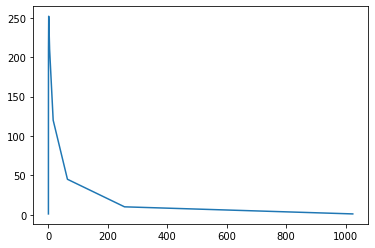

In [ ]:
moneda = 1
dias_a_calcular = 10
precios = [moneda]
precios_aux = []
i = 0

while dias_a_calcular > i:
    for precio in precios:
        precios_aux.append(precio * 2)
        precios_aux.append(precio * 0.5)
    precios = list(precios_aux)
    precios_aux = []
    i += 1 

p = 0.6
pmenos = 0.4
probabilidades = [1]
probabilidades_aux = []
y = 0
while dias_a_calcular > y:
    for prob in probabilidades:
        probabilidades_aux.append(prob * p)
        probabilidades_aux.append(prob * pmenos)
    probabilidades = list(probabilidades_aux)
    probabilidades_aux = []
    y += 1 

d = {}
for value in range(len(precios)):
    clave = str(precios[value])
    if clave not in d: 
        d[clave] = [0,0] 
    d[clave][0] += 1 # frecuencia
    d[clave][1] += probabilidades[value] #probabilidad


for valorposible in d:
  print(valorposible, d[valorposible])

x =[]
y =[]
sumapromedio = 0
for llave in d:
  val = float(llave)
  x.append(val)
  frec = d[llave][0]
  y.append(frec)
  sumapromedio += val*frec
promedio = sumapromedio/1024


print("\n la moda seria 1 con una frecuencia de 252")
print("mediana corresponde a la posicion 512, la cual corresponderia a 1")
print("media corresponde a",promedio)

print("\n El valor más probable para n = 10 y p=3/5 es 4, con una probabilidad de 0.246 \n valor que no coincide con la media,moda y mediana, por lo tanto con p=3/5 no tenemos una distribucion simétrica")

plt.plot(x, y)
plt.show()


1024 [1, 0.0009765625]
256.0 [10, 0.009765625]
64.0 [45, 0.0439453125]
16.0 [120, 0.1171875]
4.0 [210, 0.205078125]
1.0 [252, 0.24609375]
0.25 [210, 0.205078125]
0.0625 [120, 0.1171875]
0.015625 [45, 0.0439453125]
0.00390625 [10, 0.009765625]
0.0009765625 [1, 0.0009765625]

 la moda seria 1 con una frecuencia de 252
mediana corresponde a la posicion 512, la cual corresponderia a 1
media corresponde a 9.31

 El valor más probable para n = 10 y p=1/2 es 1, con una probabilidad de 0.246 
 valor que coincide con la moda y mediana, pero no con la media, por lo tanto con p=1/2 no tenemos una distribucion simétrica


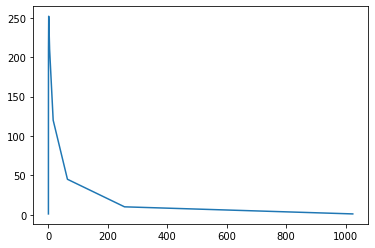

In [ ]:
moneda = 1
dias_a_calcular = 10
precios = [moneda]
precios_aux = []
i = 0

while dias_a_calcular > i:
    for precio in precios:
        precios_aux.append(precio * 2)
        precios_aux.append(precio * 0.5)
    precios = list(precios_aux)
    precios_aux = []
    i += 1 

p = 0.5
pmenos = 0.5
probabilidades = [1]
probabilidades_aux = []
y = 0
while dias_a_calcular > y:
    for prob in probabilidades:
        probabilidades_aux.append(prob * p)
        probabilidades_aux.append(prob * pmenos)
    probabilidades = list(probabilidades_aux)
    probabilidades_aux = []
    y += 1 

d = {}
for value in range(len(precios)):
    clave = str(precios[value])
    if clave not in d: 
        d[clave] = [0,0] 
    d[clave][0] += 1 # frecuencia
    d[clave][1] += probabilidades[value] #probabilidad


for valorposible in d:
  print(valorposible, d[valorposible])


x =[]
y =[]
sumapromedio = 0
for llave in d:
  val = float(llave)
  x.append(val)
  frec = d[llave][0]
  y.append(frec)
  sumapromedio += val*frec
promedio = sumapromedio/1024

print("\n la moda seria 1 con una frecuencia de 252")
print("mediana corresponde a la posicion 512, la cual corresponderia a 1")
print("media corresponde a 9.31")
print("\n El valor más probable para n = 10 y p=1/2 es 1, con una probabilidad de 0.246 \n valor que coincide con la moda y mediana, pero no con la media, por lo tanto con p=1/2 no tenemos una distribucion simétrica")


plt.plot(x, y)
plt.show()


# **Pregunta 3**

In [ ]:
def esperado_caso(caso,lista,lista_dos):
    i=1
    while i <=30:
        exp=i
        aux2=i
        valor_esp=0
        v_a=0
        while exp<=i and exp>=(-1)*exp:
            multiplicacion=(math.factorial(i)//(math.factorial(aux2)*math.factorial(i-aux2)))*(caso**aux2*(1-caso)**(i-aux2))
            valor_esp+= 2**exp*multiplicacion
            v_a+=4**exp*multiplicacion
            exp-=2
            aux2-=1
        lista.append(valor_esp)
        lista_dos.append(v_a)
        i+=1
    return (lista,lista_dos)

lista_e=[]
lista_aux=[]
valores_caso1=esperado_caso(3/5,lista_e,lista_aux)
varianzas_1=[]
dias=0

print("valores esperados 1eros 30 días con p= 3/5:", valores_caso1)

while dias<30:
  e1=valores_caso1[1][dias]
  e2=(valores_caso1[0][dias])**2
  var=e1-e2
  varianzas_1.append(var)
  dias+=1
print("varianzas para p=3/5")
print(varianzas_1)
print(len(varianzas_1))
lista_e=[]
varianzas_2=[]
valores_caso2=esperado_caso(1/2,lista_e,lista_aux)

print("valores esperados 1eros 30 días con p= 1/2:", valores_caso2)

dias=0
while dias<30:
  e1=valores_caso2[1][dias]
  e2=(valores_caso2[0][dias])**2
  var=e1-e2
  varianzas_2.append(var)
  dias+=1
print("varianzas para p=1/2")
print(varianzas_2)
print(len(varianzas_1))

print("el valor esperado para el día 30 con p=1/2 es:", valores_caso2[0][29])

valores esperados 1eros 30 días con p= 3/5: ([1.2, 1.92, 2.5919999999999996, 3.8015999999999996, 5.253119999999999, 7.492608, 10.434355199999997, 14.724218879999997, 20.567457791999995, 28.89476997119999, 40.412546334719984, 56.665854443519976, 79.29688039096318, 111.09433639698429, 155.5005894159236, 217.77165864696536, 304.8519887198826, 426.8570065491385, 597.5741202322727, 836.66233910045, 1171.3038464305225, 1639.879057131341, 2295.809211132433, 3214.182273943728, 4499.835432177892, 6299.815185072112, 8819.723027091732, 12347.654432006919, 17286.69932717829, 24201.41821415444], [2.4, 6.24, 15.551999999999998, 39.0528, 97.59743999999999, 244.13183999999993, 610.3019519999998, 1525.8710015999995, 3814.6542796799986, 9536.736028262398, 23841.820004843514, 59604.63830168369, 149011.57809629422, 372529.0239445852, 931322.5441206932, 2328306.431135197, 5820766.0636713, 14551915.223400593, 36379788.04565702, 90949470.1727133, 227373675.42006907, 568434188.603845, 1421085471.4988775, 3552

[1.2, 1.92, 2.5919999999999996, 3.8015999999999996, 5.253119999999999, 7.492608, 10.434355199999997, 14.724218879999997, 20.567457791999995, 28.89476997119999, 40.412546334719984, 56.665854443519976, 79.29688039096318, 111.09433639698429, 155.5005894159236, 217.77165864696536, 304.8519887198826, 426.8570065491385, 597.5741202322727, 836.66233910045, 1171.3038464305225, 1639.879057131341, 2295.809211132433, 3214.182273943728, 4499.835432177892, 6299.815185072112, 8819.723027091732, 12347.654432006919, 17286.69932717829, 24201.41821415444]
[1.0, 1.5, 1.75, 2.375, 2.875, 3.75, 4.609375, 5.8984375, 7.3046875, 9.25390625, 11.505859375, 14.4951171875, 18.0625, 22.682861328125, 28.30120849609375, 35.474700927734375, 44.294281005859375, 55.46058654785156, 69.27936553955078, 86.68730545043945, 108.31508255004883, 135.47794723510742, 169.30538702011108, 211.71232390403748, 264.60010981559753, 330.8276277780533, 413.4957894682884, 516.9444598257542, 646.1432132869959, 807.751248832792]


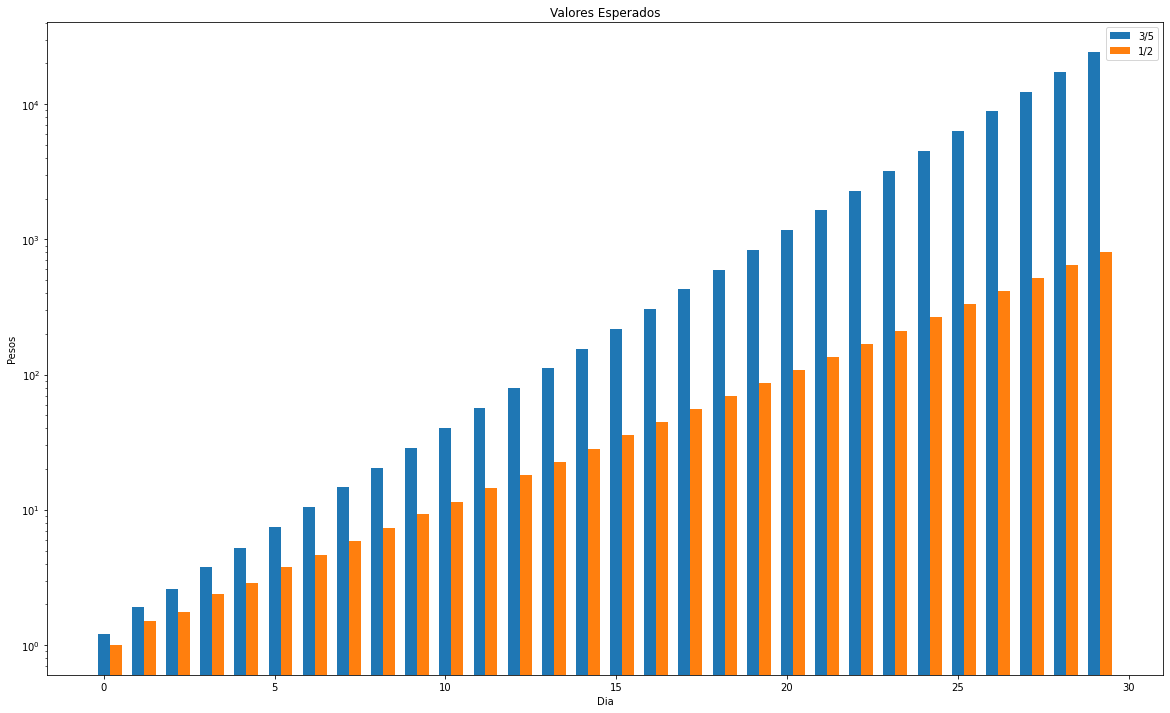

In [ ]:
serie_1 = valores_caso1
serie_2 = valores_caso2
print(serie_1)
print(serie_2)
#serie_1.std()
#print(varianza)
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35

plt.figure(figsize=(20,12))
plt.bar(indice_barras, serie_1, width=ancho_barras, label='3/5')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='1/2')
plt.legend(loc='best')
plt.yscale("log")
## Se colocan los indicadores en el eje x

 
plt.ylabel('Valores')
plt.xlabel('Dia')
plt.title('Valores Esperados por dia')

 
plt.show()


[0.96, 2.5536000000000003, 8.833535999999999, 24.60063744, 70.0021702656, 187.99266535833593, 501.42618356023286, 1309.0683799738513, 3391.633959654297, 8701.828296573836, 22208.646103587624, 56393.6192418695, 142723.5828565555, 360187.07236509887, 907142.1108119936, 2280881.935825347, 5727831.328644833, 14369708.319360502, 36022693.21648564, 90249466.30304426, 226001722.71940613, 565744985.281827, 1415814731.564957, 3542382711.106437, 8861535678.064873, 22164772821.133396, 55433363716.96493, 138625413508.16876, 346645865221.716, 866776029344.8234]
[1.4, 3.99, 12.489499999999998, 33.412175, 89.33181499999999, 230.06933999999993, 589.0556141093748, 1491.0794366585933, 3761.2958202073423, 9451.101247378609, 23709.43520488624, 59394.529879404334, 148685.32419004422, 372014.5117465542, 930521.5857183539, 2327047.976729285, 5818804.080341474, 14548839.346740361, 36374988.41516745, 90941955.48378703, 227361943.26296124, 568415834.3296579, 1421056807.1848035, 3552668856.6884785, 8881714183.76

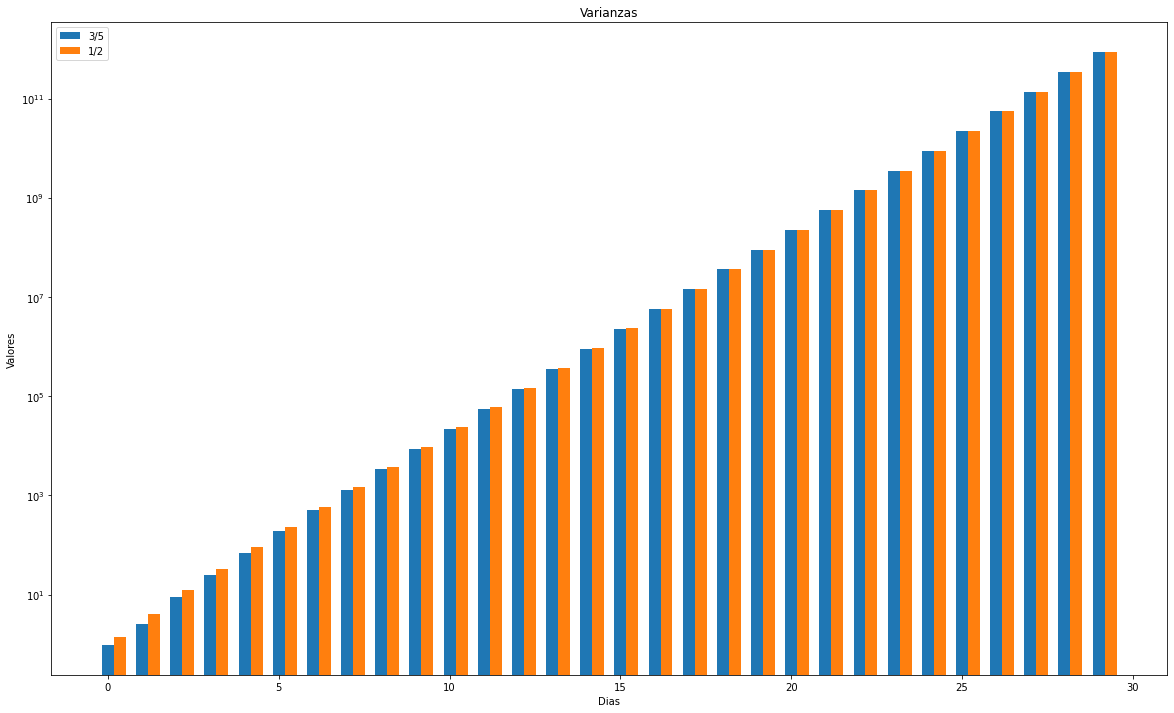

In [ ]:
serie_1 = varianzas_1
serie_2 = varianzas_2

#serie_1.std()
#print(varianza)
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35

plt.figure(figsize=(20,12))
plt.bar(indice_barras, serie_1, width=ancho_barras, label='3/5')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='1/2')
plt.legend(loc='best')
plt.yscale("log")
## Se colocan los indicadores en el eje x

 
plt.ylabel('Valores')
plt.xlabel('Dias')
plt.title('Varianzas por dia')

 
plt.show()

**Conclusiones**
Se observa que para la distribucion de valores esperados para p=3/5 es mayor a la de p=1/2, lo cual tiene sentido, ya que su probabilidad de que se duplique la moneda es más probable, por ende tiene mas posibilidades que p=1/2.En torno a su varianza se ve que esta representa grandes valores lo cual tiene sentido, ya que al alcanzar grandes valores esperados, la varianza por consecuencia tambien alcanzaria grandes valores, ademas se ve que son casi iguales para p=3/5 con p=1/2 para mayores valores esperados, solo que cada vez se van alejando poco a poco. 


# **Pregunta 4**

In [ ]:
num=30
lista_val=[]
lista_val_var=[]
def estaca5(n):
    if n==0:
        return 1
    elif random.randint(1,5) <= 3:
        potencia=(math.log(estaca5(n-1),2)+1)
        multiplicacion=1*2**potencia
        lista_val.append(multiplicacion*0.6)
        lista_val_var.append(((multiplicacion**2)*0.6)-((multiplicacion*0.6)**2))
        return multiplicacion
    else:
        potencia=(math.log(estaca5(n-1),2)-1)
        multiplicacion=1*2**potencia
        lista_val.append(multiplicacion*0.4)
        lista_val_var.append(((multiplicacion**2)*0.4)-((multiplicacion*0.4)**2))
        return multiplicacion

lista_p_unmedio=[]
lista_p_unmedio_var=[]
def estaca6(n):
    if n==0:
        return 1
    elif random.randint(1,2) == 1:
        potencia=(math.log(estaca6(n-1),2)+1)
        multiplicacion=1*2**potencia
        lista_p_unmedio.append(multiplicacion*0.5)
        lista_p_unmedio_var.append((((multiplicacion**2)*0.5)-((multiplicacion*0.5)**2)))
        return multiplicacion
    else:
        potencia=(math.log(estaca6(n-1),2)-1)
        multiplicacion=1*2**potencia
        lista_p_unmedio.append(multiplicacion*0.5)
        lista_p_unmedio_var.append((((multiplicacion**2)*0.5)-((multiplicacion*0.5)**2)))
        return multiplicacion

frec=pd.value_counts(lista_val)




suma_val =[]
suma_val_var =[]
suma_p_unmedio =[]
suma_p_unmedio_var =[]

for a in range(30):
  suma_val.append(0)
  suma_val_var.append(0)
  suma_p_unmedio.append(0)
  suma_p_unmedio_var.append(0)

grandes_numeros = 100000
i = 0
while grandes_numeros > i:
  estaca5(num)
  estaca6(num)
  for b in range(30):
    suma_val[b] = suma_val[b]+lista_val[b]
    suma_val_var[b] = suma_val_var[b]+lista_val_var[b]
    suma_p_unmedio[b] = suma_p_unmedio[b]+lista_p_unmedio[b]
    suma_p_unmedio_var[b] = suma_p_unmedio_var[b]+lista_p_unmedio_var[b]
  i += 1
   



i = 0  
while 30 > i:
  suma_val[i] = suma_val[i]/grandes_numeros
  suma_val_var[i] = suma_val_var[i]/grandes_numeros
  suma_p_unmedio[i] = suma_p_unmedio[i]/grandes_numeros
  suma_p_unmedio_var[i] = suma_p_unmedio_var[i]/grandes_numeros
  i += 1 

print("valores esperados primeros 30 dias por simulación, para p = 3/5",suma_val)
print("varianza de estos valores", suma_val_var)
print("valores esperados primeros 30 dias por simulación, para p = 1/2", suma_p_unmedio)
print("varianza de estos valores", suma_p_unmedio_var)

valores esperados primeros 30 dias por simulación, para p = 3/5 [1.1999999999980246, 2.3999999999960493, 4.799999999992099, 9.599999999984197, 19.199999999968394, 6.400000000012063, 19.199999999968394, 6.400000000012063, 3.2000000000060314, 1.6000000000030157, 0.8000000000015078, 2.3999999999960493, 0.8000000000015078, 2.3999999999960493, 4.799999999992099, 1.6000000000030157, 4.799999999992099, 9.599999999984197, 3.2000000000060314, 9.599999999984197, 19.199999999968394, 38.39999999993679, 76.79999999987358, 25.60000000004825, 76.79999999987358, 25.60000000004825, 12.800000000024125, 38.39999999993679, 76.79999999987358, 25.60000000004825]
varianza de estos valores [0.9600000000015132, 3.840000000006053, 15.360000000024211, 61.440000000096845, 245.76000000038738, 61.440000000096845, 245.76000000038738, 61.440000000096845, 15.360000000024211, 3.840000000006053, 0.9600000000015132, 3.840000000006053, 0.9600000000015132, 3.840000000006053, 15.360000000024211, 3.840000000006053, 15.360000

# **Pregunta 5**

In [ ]:
dias_que_pierda = 8
'''
fact = (math.factorial(30)/(math.factorial(dias_que_pierda) * math.factorial(30-dias_que_pierda)))
prob1 = (3/5)**(30-dias_que_pierda)
prob2= (2/5)**(dias_que_pierda)
prob_ganar = fact * prob1 * prob2
'''
l = []
while dias_que_pierda >= 0:
  fact = (math.factorial(30)/(math.factorial(dias_que_pierda) * math.factorial(30-dias_que_pierda)))
  prob1 = (3/5)**(30-dias_que_pierda)
  prob2= (2/5)**(dias_que_pierda)
  prob_ganar = fact * prob1 * prob2
  l.append(round(prob_ganar,7))
  dias_que_pierda -= 1
print(l)

sum_l = sum(l)

prob_perder = 1 - sum_l
print("Probabilidad perder dinero: ", round(prob_perder,3))

[0.0504871, 0.0263411, 0.0115242, 0.0041487, 0.0011967, 0.0002659, 4.27e-05, 4.4e-06, 2e-07]
Probabilidad perder dinero:  0.906



No convendria comprar una moneda si se debe vender despues del primer mes, ya que la probabilidad de perder dinero es muy alta (91%) comparada a la probabilidad de ganar dinero (9%), por lo que como se dijo, no seria una buena inversion comprarla.

Para esta pregunta nos faltaron simulaciones, pero segun teoria en la mayoria de ellas, segun las probabilidades, la persona debio haber perdido dinero.

In [ ]:
def estaca9(n):
    if n==0:
        return 1
    elif random.randint(1,5) <= 3:
        potencia=(math.log(estaca9(n-1),2)+1)
        multiplicacion=1*2**potencia
        multiplicacion2 = 1*2**potencia * 0.25
        valor_esperado = multiplicacion * 0.6 + multiplicacion2 * 0.4
        l_ve.append(valor_esperado)
        return multiplicacion
    else:
        potencia=(math.log(estaca9(n-1),2)-1)
        multiplicacion=1*2**potencia
        multiplicacion2 = multiplicacion * 4
        valor_esperado = multiplicacion * 0.6 + multiplicacion2 * 0.4     
        l_ve.append(valor_esperado)   
        return multiplicacion
        

l = []
l_ve = []
for i in range(30):
  l.append(estaca9(30))
  print(i, ": ",l_ve)

#print(l)
#print(l_ve)
print(stat.mean(l_ve))


0 :  [1.4, 2.8, 5.6, 11.2, 22.4, 44.8, 89.6, 179.2, 281.6, 179.2, 358.4, 563.2, 281.6, 140.8, 70.4, 44.8, 70.4, 44.8, 70.4, 35.2, 22.4, 35.2, 22.4, 35.2, 17.6, 8.8, 5.6, 11.2, 17.6, 8.8]
1 :  [1.4, 2.8, 5.6, 11.2, 22.4, 44.8, 89.6, 179.2, 281.6, 179.2, 358.4, 563.2, 281.6, 140.8, 70.4, 44.8, 70.4, 44.8, 70.4, 35.2, 22.4, 35.2, 22.4, 35.2, 17.6, 8.8, 5.6, 11.2, 17.6, 8.8, 1.1, 0.7, 1.1, 0.55, 0.275, 0.175, 0.35, 0.7, 1.1, 0.55, 0.275, 0.175, 0.275, 0.175, 0.35, 0.55, 0.35, 0.7, 1.4, 2.8, 5.6, 8.8, 5.6, 11.2, 17.6, 11.2, 22.4, 44.8, 89.6, 179.2]
2 :  [1.4, 2.8, 5.6, 11.2, 22.4, 44.8, 89.6, 179.2, 281.6, 179.2, 358.4, 563.2, 281.6, 140.8, 70.4, 44.8, 70.4, 44.8, 70.4, 35.2, 22.4, 35.2, 22.4, 35.2, 17.6, 8.8, 5.6, 11.2, 17.6, 8.8, 1.1, 0.7, 1.1, 0.55, 0.275, 0.175, 0.35, 0.7, 1.1, 0.55, 0.275, 0.175, 0.275, 0.175, 0.35, 0.55, 0.35, 0.7, 1.4, 2.8, 5.6, 8.8, 5.6, 11.2, 17.6, 11.2, 22.4, 44.8, 89.6, 179.2, 1.4, 2.8, 5.6, 8.8, 5.6, 11.2, 22.4, 44.8, 70.4, 35.2, 22.4, 35.2, 17.6, 11.2, 17.6, 11

# **Pregunta 6**

In [ ]:
def dias_hasta_5(corriendo, valor, contador_alzas, contador_dias):
    while corriendo == True:
        if random.randint(1,2) == 1:
            valor = valor*2
            contador_alzas += 1  
            contador_dias += 1  
            if contador_alzas == 5:
                corriendo = False     
        else:
            valor = valor/2
            contador_alzas = 0
            contador_dias += 1 
    return contador_dias 


valor = 1
contador_alzas = 0 
contador_dias = 0
corriendo = True
promedio_dias = 0

n_iteraciones = 100000
dos_semanas = 0
for a in range(n_iteraciones):
    dias = dias_hasta_5(corriendo, valor, contador_alzas, contador_dias)
    if dias <= 14:
      dos_semanas += 1

promedio_dias = promedio_dias/n_iteraciones
print("La probabilidad de que se registre una racha de 5 consecutivas en las primeras 2 semanas es de: ", dos_semanas/n_iteraciones)

La probabilidad de que se registre una racha de 5 consecutivas en las primeras 2 semanas es de:  0.16793


# **Pregunta 7**

In [ ]:
def dias_hasta_5(corriendo, valor, contador_alzas, contador_dias):
    while corriendo == True:
        if random.randint(1,2) == 1:
            valor = valor*2
            contador_alzas += 1  
            contador_dias += 1  
            if contador_alzas == 5:
                corriendo = False     
        else:
            valor = valor/2
            contador_alzas = 0
            contador_dias += 1 
    return contador_dias 


valor = 1
contador_alzas = 0 
contador_dias = 0
corriendo = True
promedio_dias = 0

n_iteraciones = 100000

for a in range(n_iteraciones):
    promedio_dias += dias_hasta_5(corriendo, valor, contador_alzas, contador_dias)
promedio_dias = promedio_dias/n_iteraciones
print('el promedio de días que demoró en obtener 5 rachas seguidas en', n_iteraciones, 'iteraciones fue:')
print(promedio_dias)


el promedio de días que demoró en obtener 5 rachas seguidas en 100000 iteraciones fue:
62.27014
